In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from pylab import rcParams

In [2]:
data = pd.read_csv(r"C:\Users\TANVI\AI_ML\Untitled Folder\creditcard.csv")
data.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].describe()


count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [4]:
#The Class column in looking highly skewed.

In [5]:
print(data.isnull().values.any())

False


In [6]:
#Yay no null values

([<matplotlib.patches.Wedge at 0x27a31f4c888>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Majority'),
  Text(1.2999808566936792, -0.007054943654486739, 'Minority')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.83%'),
  Text(0.7999882195038025, -0.004341503787376454, '0.17%')])

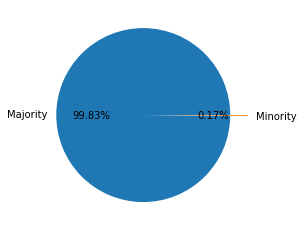

In [7]:
plt.pie(x = data.groupby(['Class']).Class.count(),
        labels = ["Majority", "Minority"], autopct='%1.2f%%', explode = (0, 0.2))


Text(1, 246, '492')

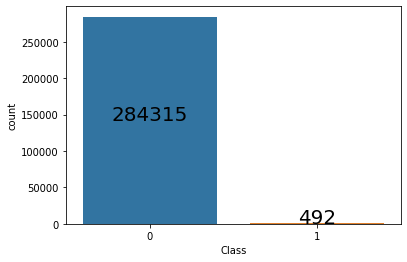

In [8]:
sns.countplot(data = data, x = 'Class')
fraudnt, fraud = data.Class.value_counts()

plt.text(0,fraudnt//2, fraudnt, fontsize = 20,  horizontalalignment='center')
plt.text(1, fraud//2,fraud, fontsize = 20, horizontalalignment='center')


In [9]:
#we can see class column is imbalanced.
#this may lead to very poor performance in real life

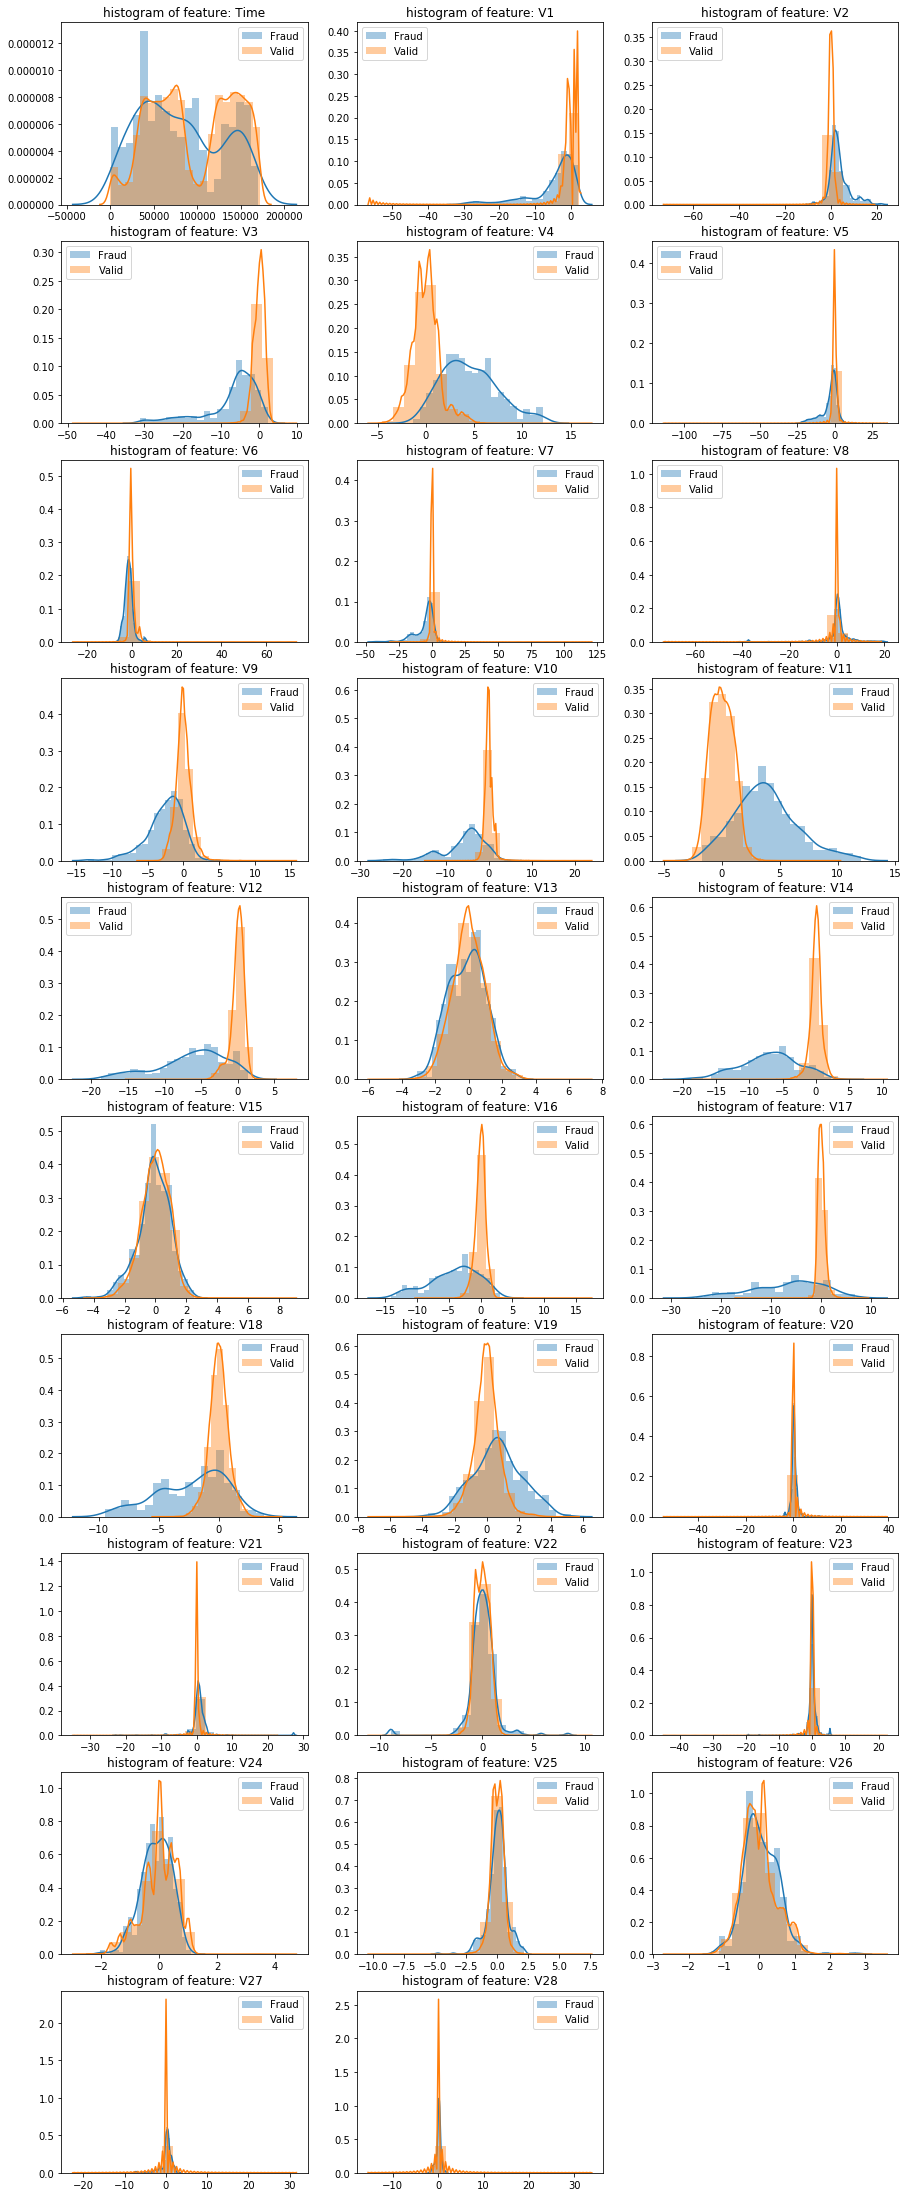

In [10]:
features = data.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = gridspec.GridSpec(29, 3)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=20,label='Fraud')
    sns.distplot(data[c][data.Class == 0], bins=20,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [ ]:
#We can see clear differences between the densities of Fraud and Valid classes. 
#Valid cases are usually concentrated together and hence have sharp density plots whereas Fraud transactions are more spread out.

Text(0.5, 0, 'Amount')

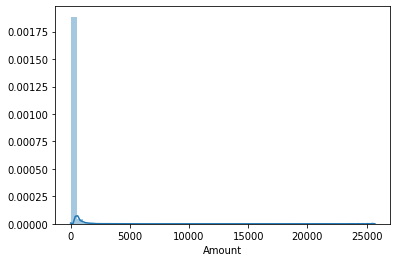

In [11]:
sns.distplot(data.Amount.values)
plt.xlabel('Amount')

Text(0.5, 0, 'Time')

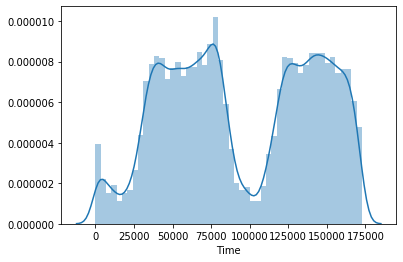

In [12]:
sns.distplot(data.Time.values)
plt.xlabel('Time')

In [13]:
#The Amount variable is highly left skewed as most people take part in low volume banking transactions 
#the time variable has visible seasonality indicating peak times and breaks that are part of a human's daily routine.

Text(0.5, 0, 'Fraud Time Transaction')

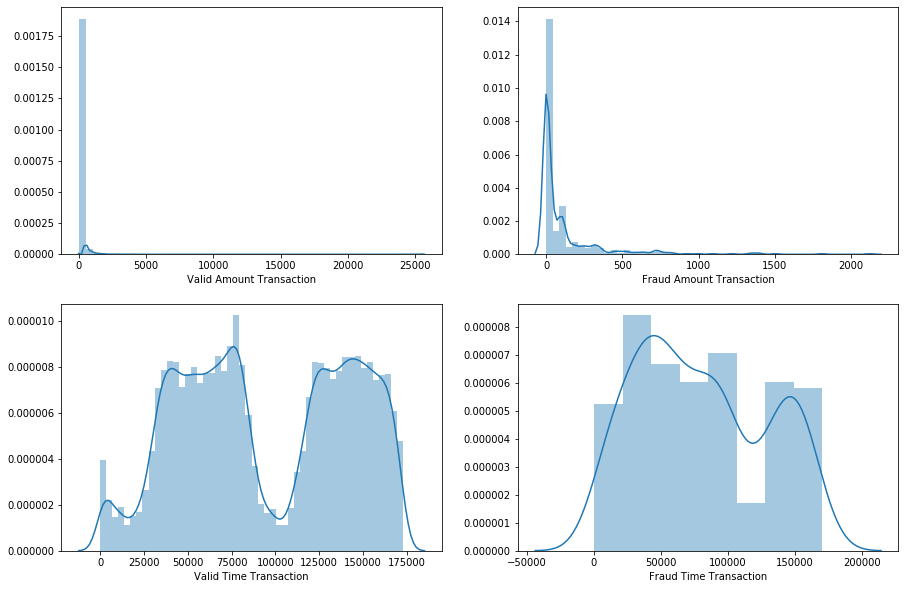

In [19]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
sns.distplot(data[data.Class == 0].Amount.values)
plt.xlabel('Valid Amount Transaction')

plt.subplot(222)
sns.distplot(data[data.Class == 1].Amount.values)
plt.xlabel('Fraud Amount Transaction')

plt.subplot(223)
sns.distplot(data[data.Class == 0].Time.values)
plt.xlabel('Valid Time Transaction')

plt.subplot(224)
sns.distplot(data[data.Class == 1].Time.values)
plt.xlabel('Fraud Time Transaction')

In [ ]:
#Not only do fraudulent transactions cash out larger sums of money from banks, 
#they also fail to follow the seasonal nature of the time as well.

Text(0.5, 0, 'Fraud Transactions')

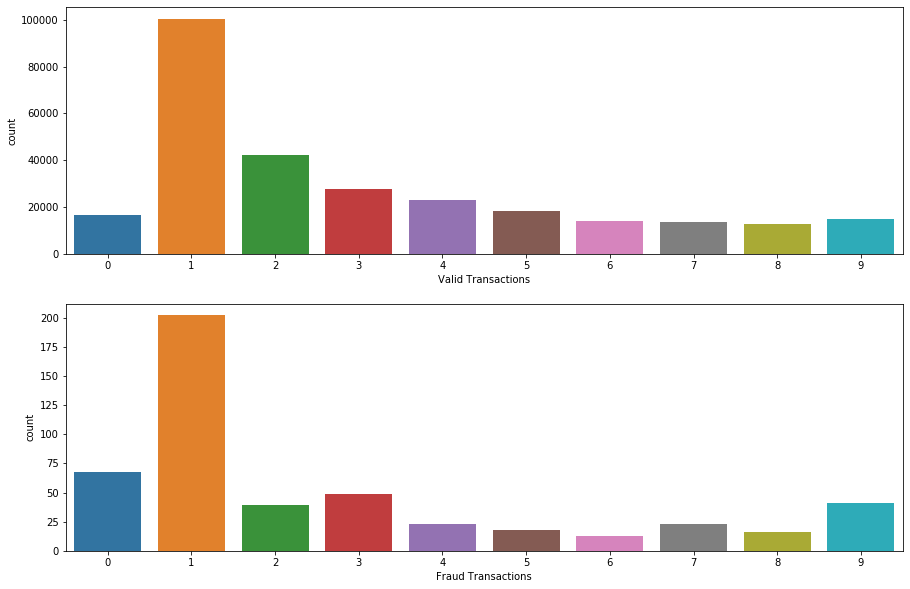

In [21]:
fig, axes = plt.subplots(figsize=(15,10))
dft = data[["Amount","Class"]].copy()
dft['Digits'] = dft.Amount.astype(str).str[:1].astype(int)

plt.subplot(211)
sns.countplot(dft[dft.Class == 0].Digits)

plt.xlabel('Valid Transactions')

plt.subplot(212)
sns.countplot(dft[dft.Class == 1].Digits)
plt.xlabel('Fraud Transactions')

What is Benford’s law?
Benford’s Law, also known as the Law of First Digits or the Phenomenon of Significant Digits, is the finding that the first digits (or numerals to be exact) of the numbers found in series of records of the most varied sources do not display a uniform distribution, but rather are arranged in such a way that the digit “1” is the most frequent, followed by “2”, “3”, and so in a successively decreasing manner down to “9”.

https://towardsdatascience.com/what-is-benfords-law-and-why-is-it-important-for-data-science-312cb8b61048

In [ ]:
#We can see that the fraudulent transactions do not follow this law, 
#hence we can infer that something is wrong with those transactions.

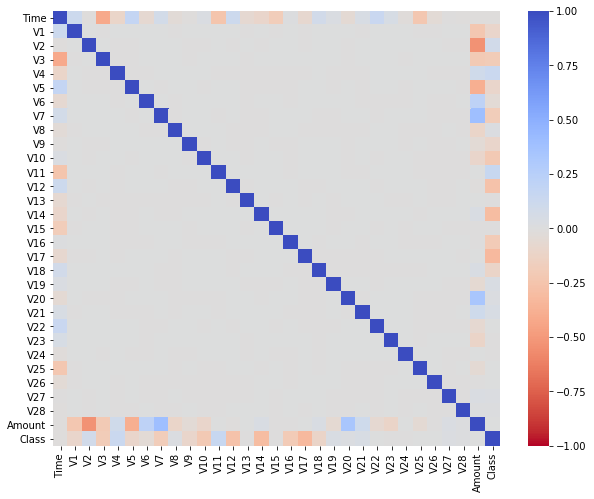

In [26]:
fig, axes = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)

In [ ]:
#There is no fearure correlation as dataset is highly imbalance
#taking a subset of the dataset can give us a clearer picture.

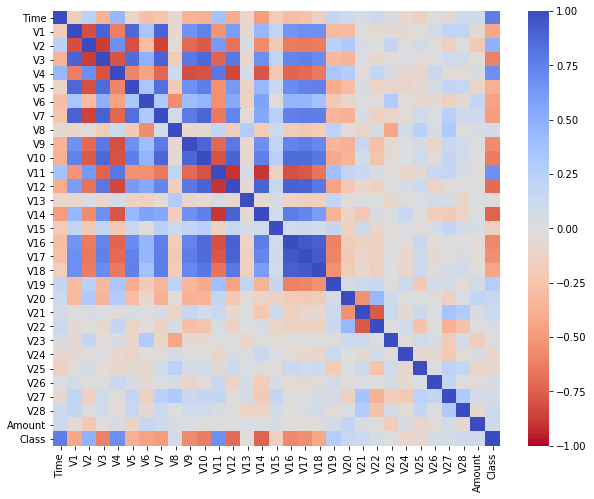

In [27]:
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]
sub_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42).reset_index(drop=True)
fig, axes = plt.subplots(figsize=(10,8))
sns.heatmap(sub_df.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)

In [ ]:
#This is much better at telling us the true correlation between the features.

In [ ]:
#To mitigate the imbalance in the dataset, 
#we can either use a subset of the non fraud cases to match the number of fraud cases, i.e. undersampling. 
#Alternatively we can increase the number of fraud cases using SMOTE, i.e. oversampling.